<a href="https://colab.research.google.com/github/bindhu520/Safe-driving-Challenge-ML-PROECT-/blob/master/trying_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.util.testing as tm

In [ ]:
data = pd.read_csv('/content/drive/My Drive/train.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
data.shape


(604329, 33)

In [ ]:
train_features, test_features, train_labels, test_labels=train_test_split(
    data.drop(labels=['IsAlert'], axis=1),
    data['IsAlert'],
    test_size=0.2,
    random_state=41)

In [ ]:
constant_filter = VarianceThreshold(threshold=0)

In [ ]:
constant_filter.fit(train_features)

VarianceThreshold(threshold=0)

In [ ]:
len(train_features.columns[constant_filter.get_support()])

29

In [ ]:
constant_columns = [column for column in train_features.columns
                    if column not in train_features.columns[constant_filter.get_support()]]

print(len(constant_columns))


3


In [ ]:
for column in constant_columns:
    print(column)

P8
V7
V9


In [ ]:
train_features = constant_filter.transform(train_features)
test_features = constant_filter.transform(test_features)

train_features.shape, test_features.shape

((483463, 29), (120866, 29))

Removing Quasi-Constant features

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.util.testing as tm

In [ ]:
data = pd.read_csv('/content/drive/My Drive/train.csv')

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(
    data.drop(labels=['IsAlert'], axis=1),
    data['IsAlert'],
    test_size=0.2,
    random_state=41)

In [ ]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(train_features)

len(train_features.columns[constant_filter.get_support()])

constant_columns = [column for column in train_features.columns
                    if column not in train_features.columns[constant_filter.get_support()]]

train_features.drop(labels=constant_columns, axis=1, inplace=True)
test_features.drop(labels=constant_columns, axis=1, inplace=True)

In [ ]:
qconstant_filter = VarianceThreshold(threshold=0.01)

In [ ]:
qconstant_filter.fit(train_features)

VarianceThreshold(threshold=0.01)

In [ ]:
len(train_features.columns[qconstant_filter.get_support()])

28

In [ ]:
qconstant_columns = [column for column in train_features.columns
                    if column not in train_features.columns[qconstant_filter.get_support()]]

print(len(qconstant_columns))

1


In [ ]:
for column in qconstant_columns:
    print(column)

E5


In [ ]:
train_features = qconstant_filter.transform(train_features)
test_features = qconstant_filter.transform(test_features)

train_features.shape, test_features.shape

((483463, 28), (120866, 28))

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.util.testing as tm

In [ ]:
data = pd.read_csv('/content/drive/My Drive/train.csv')

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(
    data.drop(labels=['IsAlert'], axis=1),
    data['IsAlert'],
    test_size=0.2,
    random_state=41)

In [ ]:
train_features_T = train_features.T
train_features_T.shape

(32, 483463)

In [ ]:
print(train_features_T.duplicated().sum())

2


In [ ]:
unique_features = train_features_T.drop_duplicates(keep='first').T

In [ ]:
unique_features.shape

(483463, 30)

In [ ]:
duplicated_features = [dup_col for dup_col in train_features.columns if dup_col not in unique_features.columns]
duplicated_features

['V7', 'V9']

In [ ]:
train_features.drop(labels=duplicated_features, axis=1, inplace=True)
test_features.drop(labels=duplicated_features, axis=1, inplace=True)

#Removing Correlated Features

In [ ]:
#num_colums = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
#numerical_columns = list(data.select_dtypes(include=num_colums).columns)
#data = data[numerical_columns]

In [ ]:
data.shape

(604329, 33)

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(
    data.drop(labels=['TrialID', 'ObsNum', 'IsAlert'], axis=1),
   data['IsAlert'],
    test_size=0.2,
    random_state=41)

In [ ]:
correlated_features = set()
correlation_matrix = data.corr()

In [ ]:
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [ ]:
len(correlated_features)

3

In [ ]:
print(correlated_features)

{'P4', 'V6', 'V10'}


In [ ]:
train_features.drop(labels=correlated_features, axis=1, inplace=True)
test_features.drop(labels=correlated_features, axis=1, inplace=True)

In [ ]:
train_features.head(5)

,P1,P2,P3,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V7,V8,V9,V11
174321,28.7719,10.08910,700,0.285411,696,86.2069,0,0.020,233.468,0,0,0.016442,366,0,0,1,42,0.0,0.00,-0.665,240,36.00630,0,0,0.0,0,8.64828
93368,37.2242,10.73010,1720,0.092110,828,72.4638,0,0.000,0.000,0,6,0.016064,350,1,2,1,44,0.0,84.97,0.000,496,3.01875,0,0,20.2,0,7.78587
410042,28.1028,8.74506,984,0.096002,516,116.2790,0,0.000,0.000,0,46,0.019025,353,0,2,1,58,0.0,116.99,-0.455,1023,3.01875,1,0,22.8,0,5.98972
73945,38.3899,20.55920,904,0.084326,780,76.9231,0,25.905,135.982,0,4,0.016001,308,1,2,1,66,0.0,89.55,0.070,752,4.50625,0,0,21.0,0,9.56586
88069,37.1305,6.30975,1232,0.098597,752,79.7872,0,0.000,0.000,0,20,0.023939,395,2,2,1,51,0.0,0.00,-0.385,752,45.01870,1,0,0.0,0,10.21380


In [ ]:
train_features.drop(labels=duplicated_features, axis=1, inplace=True)
test_features.drop(labels=duplicated_features, axis=1, inplace=True)

In [ ]:
train_features.shape

(483463, 25)

trying new

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import pandas.util.testing as tm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/My Drive/train.csv')
test=pd.read_csv('/content/drive/My Drive/test.csv')

In [ ]:
train.head(5)

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.895,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.96,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.895,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.98,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.97,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.99,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,102.07,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757


In [ ]:
train.describe()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.0,604329.000000,604329.000000
mean,250.167657,603.841765,0.578799,35.449020,11.996525,1026.671035,64.061965,0.178923,845.384610,77.887628,0.0,10.512332,102.790045,0.290565,-4.230136,0.016262,358.674738,1.757296,1.383058,0.876787,63.311256,1.315265,76.965412,-0.037710,573.786433,19.961030,0.179814,1715.688383,0.0,12.710354,0.0,3.312257,11.668277
std,145.446164,348.931601,0.493752,7.484629,3.760292,309.277877,19.755950,0.372309,2505.335141,18.577930,0.0,14.049071,127.258629,1.006162,35.508596,0.002304,27.399973,2.854852,1.608807,0.328681,18.891029,5.247204,44.387031,0.403896,298.412888,63.269456,0.384033,618.176470,0.0,11.532085,0.0,1.243586,9.934423
min,0.000000,0.000000,0.000000,-22.481200,-45.629200,504.000000,23.885300,0.038920,128.000000,0.262224,0.0,0.000000,0.000000,0.000000,-250.000000,0.008000,260.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.795000,240.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,1.676730
25%,125.000000,302.000000,0.000000,31.758100,9.903540,792.000000,49.180300,0.092110,668.000000,66.666700,0.0,0.000000,0.000000,0.000000,-8.000000,0.015686,348.000000,0.000000,0.000000,1.000000,52.000000,0.000000,41.930000,-0.175000,255.000000,1.487500,0.000000,1259.000000,0.0,0.000000,0.0,3.000000,7.947680
50%,250.000000,604.000000,1.000000,34.145100,11.400400,1000.000000,60.000000,0.105083,800.000000,75.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.016001,365.000000,1.000000,1.000000,1.000000,67.000000,0.000000,100.400000,0.000000,511.000000,3.018750,0.000000,1994.000000,0.0,12.800000,0.0,4.000000,10.772600
75%,374.000000,906.000000,1.000000,37.311900,13.644200,1220.000000,75.757600,0.138814,900.000000,89.820400,0.0,28.240000,211.584000,0.000000,6.000000,0.016694,367.000000,2.000000,2.000000,1.000000,73.000000,0.000000,108.500000,0.070000,767.000000,7.481250,0.000000,2146.000000,0.0,21.900000,0.0,4.000000,15.270900
max,510.000000,1210.000000,1.000000,101.351000,71.173700,2512.000000,119.048000,27.202200,228812.000000,468.750000,0.0,243.991000,359.995000,4.000000,260.000000,0.023939,513.000000,25.000000,9.000000,1.000000,127.000000,52.400000,129.700000,3.990000,1023.000000,484.488000,1.000000,4892.000000,0.0,82.100000,0.0,7.000000,262.534000


In [ ]:
train.isnull().sum()

TrialID    0
ObsNum     0
IsAlert    0
P1         0
P2         0
P3         0
P4         0
P5         0
P6         0
P7         0
P8         0
E1         0
E2         0
E3         0
E4         0
E5         0
E6         0
E7         0
E8         0
E9         0
E10        0
E11        0
V1         0
V2         0
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  604329 non-null  int64  
 1   ObsNum   604329 non-null  int64  
 2   IsAlert  604329 non-null  int64  
 3   P1       604329 non-null  float64
 4   P2       604329 non-null  float64
 5   P3       604329 non-null  int64  
 6   P4       604329 non-null  float64
 7   P5       604329 non-null  float64
 8   P6       604329 non-null  int64  
 9   P7       604329 non-null  float64
 10  P8       604329 non-null  int64  
 11  E1       604329 non-null  float64
 12  E2       604329 non-null  float64
 13  E3       604329 non-null  int64  
 14  E4       604329 non-null  int64  
 15  E5       604329 non-null  float64
 16  E6       604329 non-null  int64  
 17  E7       604329 non-null  int64  
 18  E8       604329 non-null  int64  
 19  E9       604329 non-null  int64  
 20  E10      604329 non-null  

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


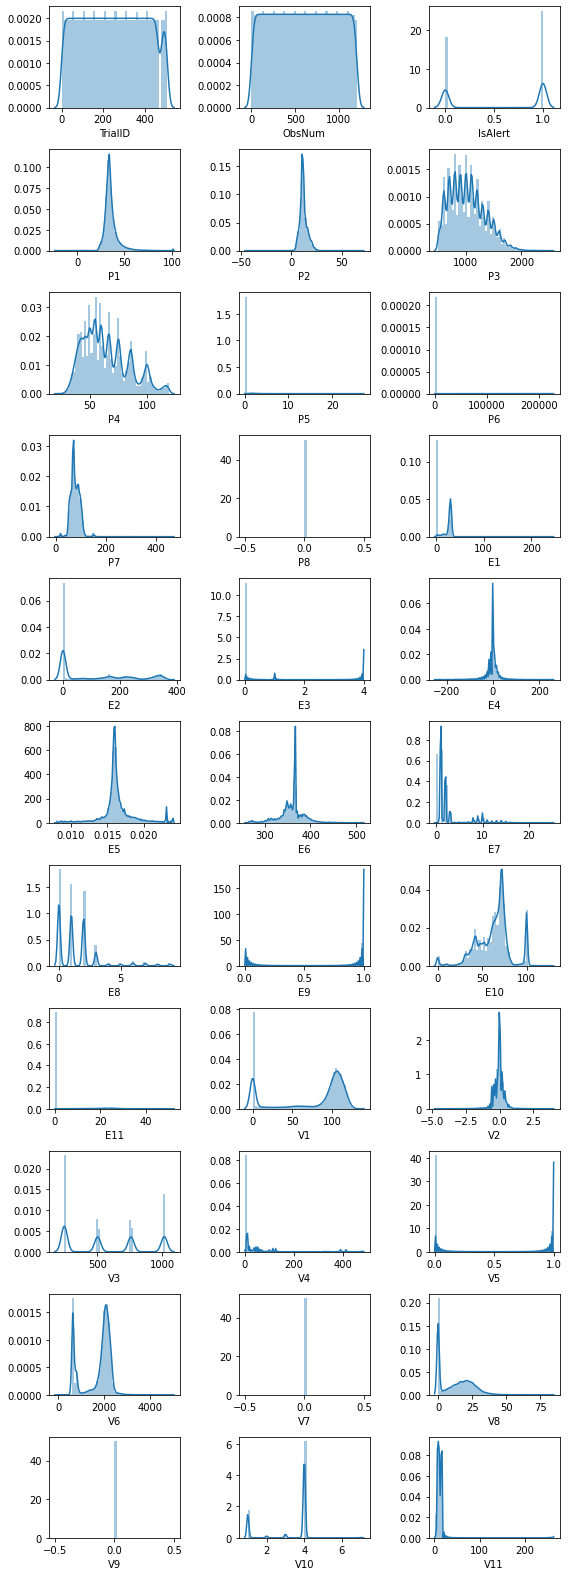

In [ ]:
num_column=train.select_dtypes(include=['int64','float64']).columns
plt.figure(figsize=(8,22))
i=1
for c in num_column:
    plt.subplot(11,3,i)
    sns.distplot(train[c])
    i+=1
    
plt.tight_layout()
plt.show()

In [ ]:
train=train.drop(['P8','V7','V9'],axis=1)

In [ ]:
train.columns

Index(['TrialID', 'ObsNum', 'IsAlert', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6',
       'P7', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10',
       'E11', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V8', 'V10', 'V11'],
      dtype='object')

In [ ]:
corr_features = set()
correlation=train.corr()
correlation

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V8,V10,V11
TrialID,1.000000,-0.000162,-0.145816,0.016772,-0.004473,0.000369,0.001880,0.022632,0.005377,0.111903,-0.061881,0.015610,-0.087071,-0.050151,0.234524,-0.034418,-0.116919,-0.095434,0.116988,-0.100521,0.073676,-0.117728,0.065063,0.001900,-0.074320,0.123721,-0.097389,-0.047593,-0.093818,0.078887
ObsNum,-0.000162,1.000000,-0.005143,0.018324,-0.001764,0.002199,-0.001191,0.005568,-0.015791,0.003498,-0.000122,-0.003558,0.002931,-0.004580,0.010314,-0.003838,0.002005,0.009400,-0.002779,-0.008684,0.004978,0.004242,0.019009,0.007753,-0.000480,-0.006284,0.003935,0.008191,0.005145,-0.011465
IsAlert,-0.145816,-0.005143,1.000000,0.018361,0.014383,0.005168,-0.008177,0.038160,-0.000400,0.189796,-0.160830,-0.105495,0.157973,0.047992,-0.067453,-0.189198,-0.329722,-0.283440,0.380353,-0.067051,0.079002,-0.269967,-0.050740,-0.062000,0.097022,0.055429,-0.244150,-0.165550,-0.259607,0.155722
P1,0.016772,0.018324,0.018361,1.000000,-0.006674,-0.010317,0.011704,0.010911,0.045429,0.027461,-0.015436,-0.009356,0.024131,-0.010574,-0.006564,-0.004635,-0.013194,-0.010918,0.004688,0.004549,0.015882,-0.025763,-0.021118,0.002551,0.021404,0.051348,-0.019792,-0.029747,-0.004563,0.344636
P2,-0.004473,-0.001764,0.014383,-0.006674,1.000000,-0.002539,0.002132,0.008390,-0.022003,0.052171,-0.012045,-0.019121,0.062076,0.003529,-0.005140,-0.006843,-0.002058,0.002920,0.002266,0.014589,0.001857,0.011310,0.001779,0.002272,-0.006038,-0.023902,0.010608,0.008257,0.001946,-0.034248
P3,0.000369,0.002199,0.005168,-0.010317,-0.002539,1.000000,-0.944435,0.035129,0.012444,-0.006097,0.005795,0.013007,-0.016437,0.000515,0.004496,-0.004508,-0.014086,-0.014135,0.018113,-0.013289,0.007423,-0.011347,0.008651,-0.006380,0.013045,0.001312,-0.010245,-0.007963,-0.009630,-0.009808
P4,0.001880,-0.001191,-0.008177,0.011704,0.002132,-0.944435,1.000000,-0.032897,-0.010627,0.007323,-0.004870,-0.010749,0.010696,0.001580,-0.003086,0.004230,0.013755,0.012959,-0.016615,0.010501,-0.005681,0.010061,-0.006926,0.008049,-0.010905,0.001705,0.008348,0.005379,0.008906,0.009841
P5,0.022632,0.005568,0.038160,0.010911,0.008390,0.035129,-0.032897,1.000000,0.002314,-0.023628,-0.062955,-0.033420,0.069444,-0.002757,-0.020218,-0.006387,-0.032576,-0.048551,0.005177,-0.074753,0.028216,-0.054428,0.026232,0.005371,0.070290,-0.016671,-0.046353,-0.023359,-0.022193,-0.004897
P6,0.005377,-0.015791,-0.000400,0.045429,-0.022003,0.012444,-0.010627,0.002314,1.000000,-0.125580,-0.006273,0.006025,-0.025157,-0.001288,-0.007514,0.011529,-0.006923,-0.008941,-0.005549,-0.034470,-0.008939,-0.024449,-0.010418,-0.004996,0.019121,0.029222,-0.025728,-0.016850,-0.002163,0.012783
P7,0.111903,0.003498,0.189796,0.027461,0.052171,-0.006097,0.007323,-0.023628,-0.125580,1.000000,-0.087373,-0.091327,0.294528,0.026627,0.051338,-0.105148,-0.042634,0.022973,0.045725,0.109924,0.084846,-0.043512,0.025850,0.007986,0.037711,0.024499,-0.020696,-0.008450,-0.041814,0.019360


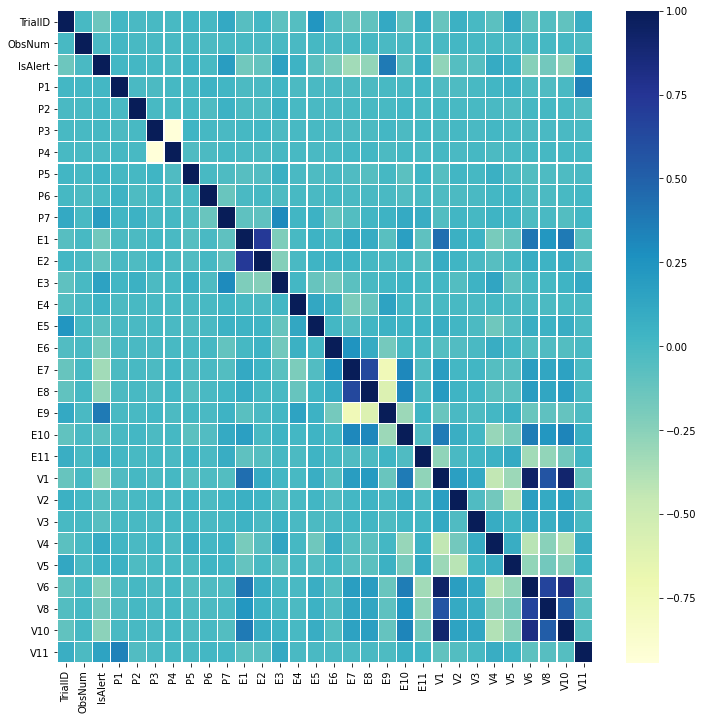

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(correlation,linewidths=0.2,cmap="YlGnBu")

In [ ]:
for i in range(len(correlation.columns)):
    for j in range(i):
        if abs(correlation.iloc[i, j]) > 0.8:
            colname = correlation.columns[i]
            corr_features.add(colname)

In [ ]:
train.drop(labels=corr_features, axis=1, inplace=True)
test.drop(labels=corr_features, axis=1, inplace=True)

In [ ]:
corr_features

{'P4', 'V10', 'V6'}

In [ ]:
train.columns

Index(['TrialID', 'ObsNum', 'IsAlert', 'P1', 'P2', 'P3', 'P5', 'P6', 'P7',
       'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11',
       'V1', 'V2', 'V3', 'V4', 'V5', 'V8', 'V11'],
      dtype='object')

In [ ]:
clf_CV = LogisticRegressionCV(cv=10, random_state=0, solver = 'liblinear') # Model Setting
clf_CV.fit(trai, new_df.IsAlert) # Model Fitting

In [ ]:
skf = StratifiedKFold(n_splits=10)
params = {}
nb = GaussianNB()
gs = GridSearchCV(nb, cv=skf, param_grid=params, return_train_score=True)

NameError: ignored